Downloading data & see how head look

In [40]:
import pandas as pd

data = pd.read_csv('iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Number of flowers species

In [41]:
group = data.groupby('Species').size()

print(group)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Remove not needed Id column, and map species into numbers

In [42]:
data = data.drop('Id', axis=1)

data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 0
data.loc[data['Species'] == 'Iris-versicolor', 'Species'] = 1
data.loc[data['Species'] == 'Iris-virginica', 'Species'] = 2

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Species column cast into integer

In [43]:
print(data.dtypes)

data = data.apply(pd.to_numeric)

print()
print(data.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object


See samples on graphs

Legend:
Violet - Iris-setosa
Green - Iris-versicolor
Yellow - Iris-virginica


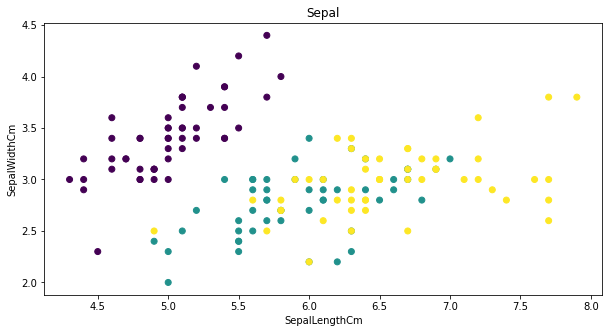

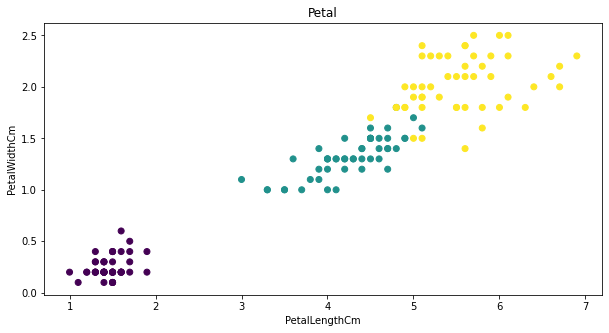

In [66]:
import matplotlib.pyplot as plt

print('Legend:')
print('Violet - Iris-setosa')
print('Green - Iris-versicolor')
print('Yellow - Iris-virginica')

plt.figure(figsize=(10, 5))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = data['Species'])
plt.title('Sepal')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1]) 
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c = data['Species'])
plt.title('Petal')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3]) 
plt.show()

In [45]:
data_array = data.values

x_data = data_array[:, :4]
y_data = data_array[:, 4]

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2)

ss = StandardScaler()

unscaled_features = train_x

train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)
train_y = to_categorical(train_y)

In [47]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

input_layer = Input(shape=(4,), name='input')
hidden_layer1 = Dense(units=30, activation="relu", name="hidden_layer1")(input_layer)
output_layer = Dense(units=3, activation="tanh", name="output_layer")(hidden_layer1)
model = Model(input_layer, output_layer)
epochs = 1000
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

loss = 0
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = model(train_x)
        loss = loss_object(train_y, predictions)

        if epoch % 50 == 0:
            print("%d / 50 -- loss = %.4f" % (epoch, loss.numpy()))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
print("loss = %.4f" % (loss.numpy()))

0 / 50 -- loss = 0.3049
50 / 50 -- loss = 0.0853
100 / 50 -- loss = 0.0657
150 / 50 -- loss = 0.0544
200 / 50 -- loss = 0.0461
250 / 50 -- loss = 0.0404
300 / 50 -- loss = 0.0364
350 / 50 -- loss = 0.0337
400 / 50 -- loss = 0.0317
450 / 50 -- loss = 0.0302
500 / 50 -- loss = 0.0289
550 / 50 -- loss = 0.0279
600 / 50 -- loss = 0.0271
650 / 50 -- loss = 0.0264
700 / 50 -- loss = 0.0258
750 / 50 -- loss = 0.0252
800 / 50 -- loss = 0.0247
850 / 50 -- loss = 0.0243
900 / 50 -- loss = 0.0239
950 / 50 -- loss = 0.0236
loss = 0.0233


In [48]:
import numpy as np

classes = np.argmax(model(test_x).numpy(), axis=1)

y_pred = model(test_x).numpy()
y_pred_bool = np.argmax(y_pred, axis=1)

accuration = np.sum(classes == test_y)/len(test_y) * 100

print("Test Accuration : " + str(accuration) + '%')
print("Prediction :")
print(classes)
print("Target :")
print(np.asarray(test_y, dtype="int32"))

Test Accuration : 96.66666666666667%
Prediction :
[2 2 0 1 2 1 0 2 1 1 2 0 0 1 1 2 0 2 1 0 2 0 2 2 1 2 1 1 0 0]
Target :
[2 2 0 1 2 1 0 2 1 1 2 0 0 1 1 2 0 2 1 0 2 0 2 2 2 2 1 1 0 0]


In [49]:
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred_bool))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.90      1.00      0.95         9
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

